In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
est_2024= pd.read_csv('/content/Eleccion 2024 x Estado - Hoja 1.csv')
est_2024.head()

,Estados,Mov. Ciudadano,"PRI, PAN, PRD","VERDE, PT, MORENA"
0,Aguascalientes,59498,306262,284706
1,Baja California,155262,330657,1039973
2,Baja California Sur,29825,101136,201126
3,Campeche,94280,69546,275315
4,Coahuila,85857,617208,853437


In [ ]:
# Calcular los estadísticos de importancia para cada coalición
estadisticos = est_2024.describe().loc[['mean', 'std'], ['Mov. Ciudadano', 'PRI, PAN, PRD', 'VERDE, PT, MORENA']]
estadisticos

,Mov. Ciudadano,"PRI, PAN, PRD","VERDE, PT, MORENA"
mean,193897.187500,515709.281250,1.122641e+06
std,192563.523803,514403.937581,9.851756e+05


#Suponer que las elecciones se pueden medir mediante una variable aleatoriaque se distribuye normal y hacer una simulación de 1000, 10,000, 100,000 1,000,000 y 10,000,000 de valores.

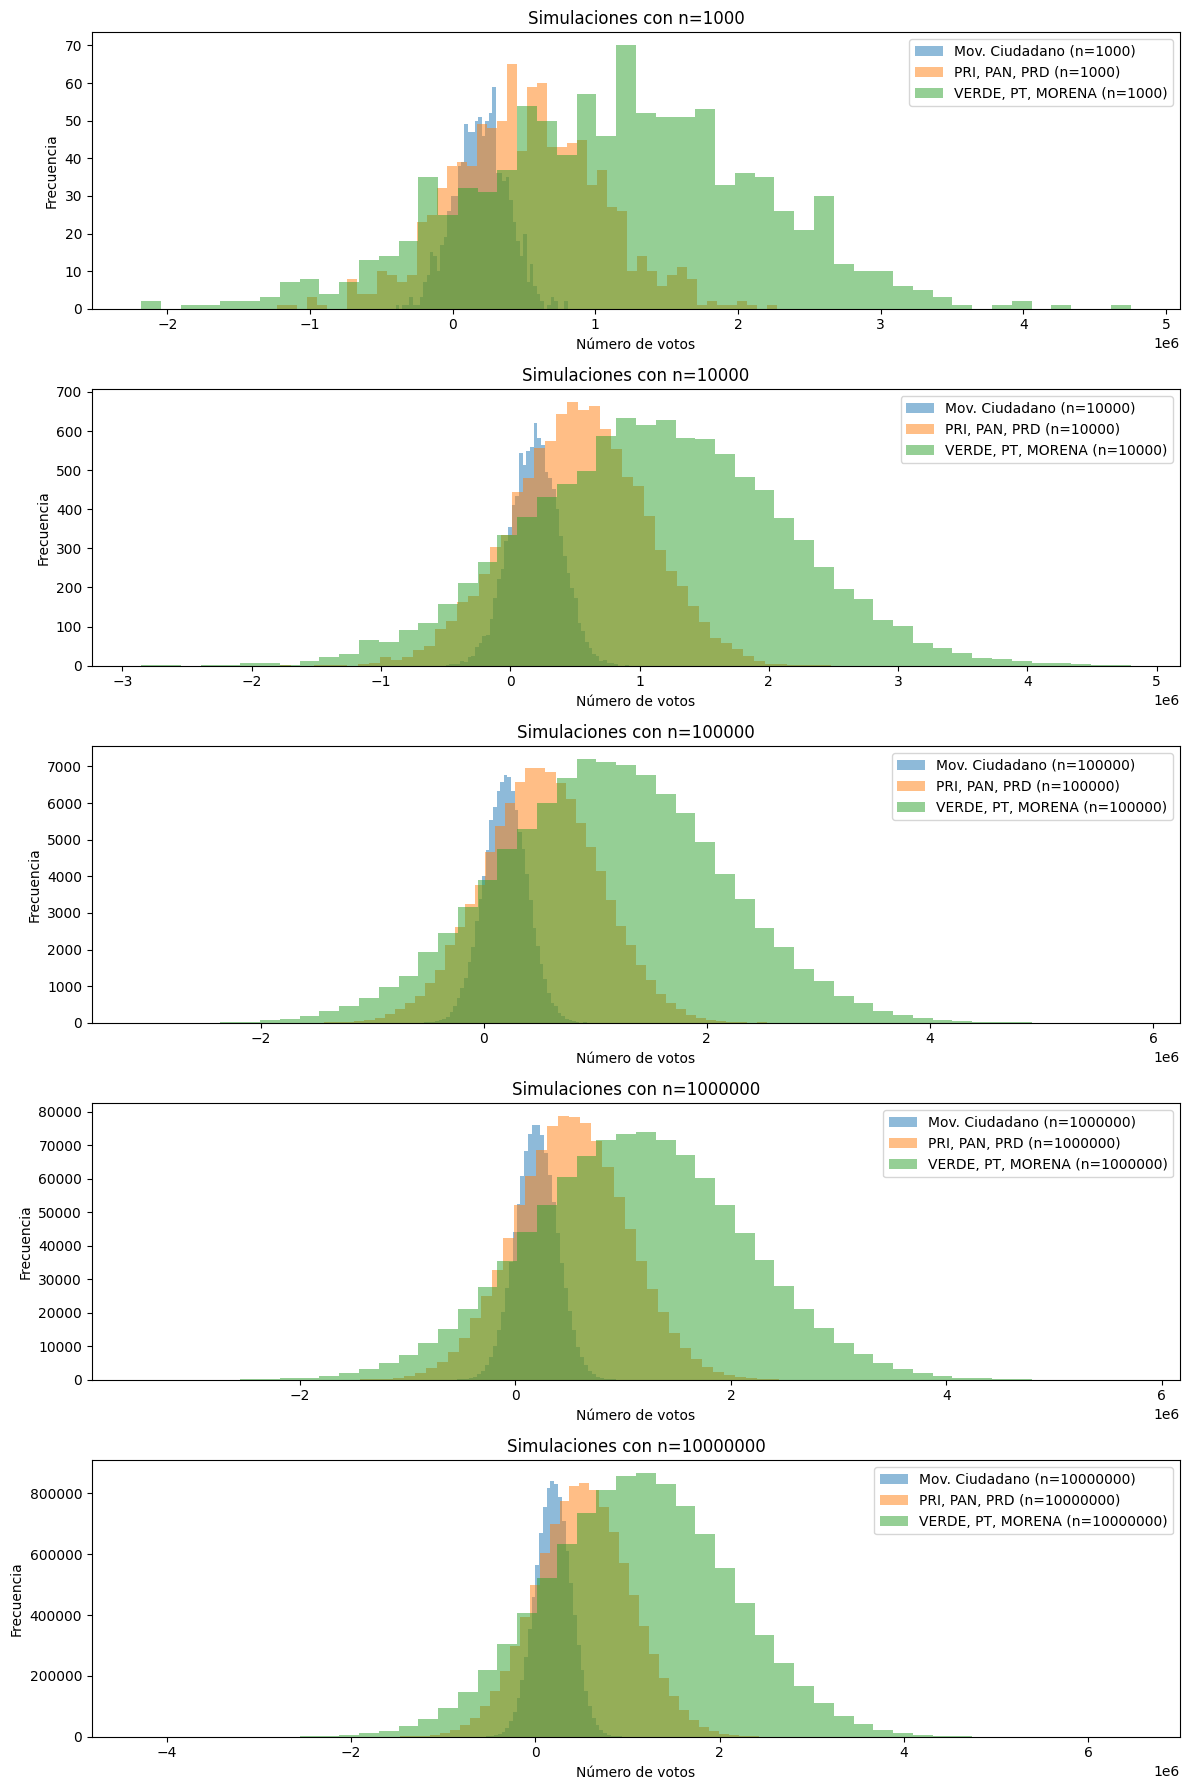

In [ ]:
# Parámetros de las distribuciones normales
parametros = {
    'Mov. Ciudadano': {'mean': 193897.18, 'std': 192563.52},
    'PRI, PAN, PRD': {'mean': 515709.28, 'std': 514403.93},
    'VERDE, PT, MORENA': {'mean': 1122441.00, 'std': 985175.60}
}

# Realizar simulaciones
n_sim = [1000, 10000, 100000, 1000000, 10000000]
simulaciones = {n: {coalition: np.random.normal(parametros[coalition]['mean'], parametros[coalition]['std'], n) for coalition in parametros} for n in n_sim}

# Crear histogramas comparativos
fig, axs = plt.subplots(len(n_sim), 1, figsize=(12, 18))

for i, n in enumerate(n_sim):
    for coalition in parametros:
        axs[i].hist(simulaciones[n][coalition], bins=50, alpha=0.5, label=f'{coalition} (n={n})')
    axs[i].set_title(f'Simulaciones con n={n}')
    axs[i].set_xlabel('Número de votos')
    axs[i].set_ylabel('Frecuencia')
    axs[i].legend()

plt.tight_layout()
plt.show()

#Progresión de la Distribución en las Simulaciones

##En las gráficas se observa la progresión de la distribución en cada una de las simulaciones. En la primera gráfica, la distribución es más irregular en comparación con las gráficas inferiores. Conforme aumentamos el número de simulaciones, estas distribuciones se suavizan y adquieren una forma más cercana a una distribución normal.

##A pesar de esta suavización, se puede observar claramente la ventaja en el volumen de votos del grupo político Morena, Verde y PT.

##También se puede notar que, conforme aumentamos el número de simulaciones, los resultados se vuelven menos variables. Sin embargo, los números obtenidos en votos para cada grupo político muestran consistentemente un amplio margen a favor del grupo Morena, Verde y PT.